# SGD Classifier
---
- Logistic Regression에 SGD(확률적경사하강법)를 적용한 모델
- 필수 설정 파라미터
    - loss pram : 이진/다중 손실함수 이름 지정

In [518]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

# [1] 데이터 준비

In [519]:
# DF로딩 및 확인
fishDF = pd.read_csv(r'../data/fish.csv')
print(fishDF.head(5))

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [520]:
# 특성 데이터 + 타겟 분리
fish_input = fishDF[fishDF.columns[1:]]
fish_target = fishDF[fishDF.columns[0]].to_numpy()

In [521]:
# 학습용, 테스트용 데이터 분리 => 8:2
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [522]:
# 표준화(평균 : 0, 표준편차 : 1)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# [2] 모델 생성 및 학습

In [523]:
# 최적화 경사하강법 변경 -> BGD => SGD
sc = SGDClassifier(loss='log',
                   max_iter=10,
                   random_state=42)
classes = np.unique(train_target)

In [524]:
# 학습 진행 fit() : 반복 횟수 즉 max_iter 만큼 학습
# sc.fit(train_scaled, train_target)

In [525]:
# # 모델 평가
# print(sc.score(train_scaled, train_target))
# print(sc.score(test_scaled, test_target))

In [526]:
# partial_fit() : 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target, classes=classes)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [527]:
# 모델 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.5294117647058824
0.65


# 학습 횟수(epoch)와 과/소적합

In [528]:
# 최적의 학습 횟수 찾기
train_score = []
test_score = []
for i in range(0, 100):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    print(f'학습 횟수 {i}회')
    print('train score :', sc.score(train_scaled, train_target))
    print('test score  :', sc.score(test_scaled, test_target))

학습 횟수 0회
train score : 0.6218487394957983
test score  : 0.55
학습 횟수 1회
train score : 0.6386554621848739
test score  : 0.575
학습 횟수 2회
train score : 0.7310924369747899
test score  : 0.7
학습 횟수 3회
train score : 0.7226890756302521
test score  : 0.7
학습 횟수 4회
train score : 0.7310924369747899
test score  : 0.7
학습 횟수 5회
train score : 0.7647058823529411
test score  : 0.725
학습 횟수 6회
train score : 0.7310924369747899
test score  : 0.775
학습 횟수 7회
train score : 0.8151260504201681
test score  : 0.825
학습 횟수 8회
train score : 0.7478991596638656
test score  : 0.7
학습 횟수 9회
train score : 0.8319327731092437
test score  : 0.825
학습 횟수 10회
train score : 0.8151260504201681
test score  : 0.8
학습 횟수 11회
train score : 0.8571428571428571
test score  : 0.85
학습 횟수 12회
train score : 0.8571428571428571
test score  : 0.9
학습 횟수 13회
train score : 0.8403361344537815
test score  : 0.85
학습 횟수 14회
train score : 0.865546218487395
test score  : 0.9
학습 횟수 15회
train score : 0.865546218487395
test score  : 0.9
학습 횟수 16회
train score :

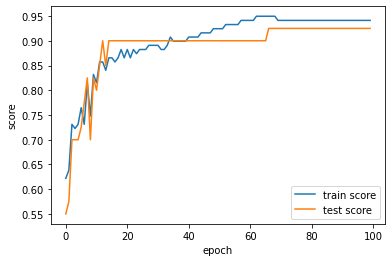

In [529]:
plt.plot(train_score, label='train score')
plt.plot(test_score, label='test score')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend()
plt.show()

In [530]:
# 학습 중에 최적값을 찾으면 조기종료 되게 하기
# n_iter_no_change => n번동안 변경되지 않은 경우
sc = SGDClassifier(loss='log',
                   tol=1,
                   n_iter_no_change=10,
                   early_stopping=False,
                   random_state=42)
sc.fit(train_scaled, train_target)

print('train score :', sc.score(train_scaled, train_target))
print('test score  :', sc.score(test_scaled, test_target))
print(sc.n_iter_)

train score : 0.8571428571428571
test score  : 0.875
13
